In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from in2stellar import Tracks, DenseNetworkGrid, set_seed
from interstellar import Tracks, DenseNetworkGrid, set_seed
%matplotlib inline

In [2]:
data_path = '/rds/projects/d/daviesgr-cartography/mesa_grid/grid2_zams_agb/simple_grid_alex'

In [3]:
tracks = Tracks(data_path)

In [4]:
tracks.compile_metadata()
tracks.get_metadata()

,file_name,m,Y,FeH,MLT,ov,dif
0,m1.0Y0.24FeH-0.1MLT2.3ov0.0dif1.csv,1.00,0.24,-0.1,2.3,0.0,1
1,m0.92Y0.28FeH-0.3MLT1.7ov0.0dif1.csv,0.92,0.28,-0.3,1.7,0.0,1
2,m0.82Y0.32FeH0.1MLT2.1ov0.0dif1.csv,0.82,0.32,0.1,2.1,0.0,1
3,m0.82Y0.24FeH0.0MLT1.9ov0.0dif1.csv,0.82,0.24,0.0,1.9,0.0,1
4,m1.17Y0.28FeH0.1MLT2.3ov0.0dif1.csv,1.17,0.28,0.1,2.3,0.0,1
...,...,...,...,...,...,...,...
10691,m0.84Y0.32FeH-0.1MLT2.3ov0.0dif1.csv,0.84,0.32,-0.1,2.3,0.0,1
10692,m0.84Y0.28FeH-0.4MLT1.7ov0.0dif1.csv,0.84,0.28,-0.4,1.7,0.0,1
10693,m1.13Y0.26FeH0.1MLT2.1ov0.0dif1.csv,1.13,0.26,0.1,2.1,0.0,1
10694,m1.1Y0.28FeH-0.4MLT1.7ov0.0dif1.csv,1.10,0.28,-0.4,1.7,0.0,1


In [5]:
tracks.compile_data()
tracks.get_data()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,star_feh,delta_nu_fit
0,0,1.00,0.24,-0.1,2.3,1.000000,0.000117,0.000013,4645.111846,9.102513,4.664952,3.100195,-0.100123,12.421090
1,0,1.00,0.24,-0.1,2.3,1.000000,0.000121,0.000013,4646.796973,8.869433,4.601499,3.112091,-0.100117,12.685399
2,0,1.00,0.24,-0.1,2.3,1.000000,0.000125,0.000014,4647.737730,8.690322,4.552957,3.121302,-0.100103,12.894007
3,0,1.00,0.24,-0.1,2.3,1.000000,0.000128,0.000014,4648.474193,8.553160,4.515453,3.128487,-0.100092,13.059153
4,0,1.00,0.24,-0.1,2.3,1.000000,0.000130,0.000014,4649.057912,8.443823,4.485372,3.134292,-0.100084,13.194113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10966927,2,1.12,0.32,0.1,1.9,1.117182,5.160961,1.300383,5016.261144,4.292697,2.747032,3.608286,0.092133,31.403249
10966928,2,1.12,0.32,0.1,1.9,1.117176,5.162723,1.300827,5014.258156,4.313443,2.755862,3.605496,0.092133,31.249675
10966929,2,1.12,0.32,0.1,1.9,1.117170,5.164464,1.301265,5012.440330,4.333759,2.764348,3.602823,0.092283,31.096966
10966930,2,1.12,0.32,0.1,1.9,1.117164,5.166181,1.301698,5010.615529,4.354397,2.772941,3.600125,0.092359,30.952028


Note, CHeB evolutionary stage is included below due to an error in the data. No Core He-burning tracks were computed but some rows are labelled as such. Since evolutionary stage isn't going to be used in the training or models, this is not an issue. 

In [6]:
tracks.select_evolution(stages=['dwarf', 'giant', 'CHeB'])['evol_stage'].unique()

array([1, 2, 3])

In [7]:
tracks.select_evolution(stages=['dwarf', 'giant', 'CHeB'], inplace=True)

In [8]:
x_cols = ['frac_age', 'initial_mass', 'initial_feh', 'initial_MLT', 'initial_Yinit']
y_cols = ['star_age', 'effective_T', 'radius', 'delta_nu_fit', 'star_feh']

In [9]:
non_log = ['initial_feh', 'star_feh']
log_cols = [col for col in x_cols+y_cols if not any([col == n for n in non_log])]
log_cols

['frac_age',
 'initial_mass',
 'initial_MLT',
 'initial_Yinit',
 'star_age',
 'effective_T',
 'radius',
 'delta_nu_fit']

In [10]:
tracks.log10(columns=log_cols, inplace=True)
tracks.get_data()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,...,star_feh,delta_nu_fit,log_frac_age,log_initial_mass,log_initial_MLT,log_initial_Yinit,log_star_age,log_effective_T,log_radius,log_delta_nu_fit
407,1,1.00,0.24,-0.1,2.3,1.000000,0.036467,0.004031,5788.367004,0.760630,...,-0.100188,166.870788,-2.394550,0.000000,0.361728,-0.619789,-1.438096,3.762556,-0.061267,2.222380
408,1,1.00,0.24,-0.1,2.3,1.000000,0.037214,0.004114,5779.922526,0.749957,...,-0.100198,167.908017,-2.385753,0.000000,0.361728,-0.619789,-1.429299,3.761922,-0.063067,2.225071
409,1,1.00,0.24,-0.1,2.3,1.000000,0.038109,0.004213,5772.288187,0.741406,...,-0.100209,168.686938,-2.375426,0.000000,0.361728,-0.619789,-1.418973,3.761348,-0.064409,2.227081
410,1,1.00,0.24,-0.1,2.3,1.000000,0.039184,0.004332,5766.020545,0.735484,...,-0.100221,169.154413,-2.363350,0.000000,0.361728,-0.619789,-1.406896,3.760876,-0.065207,2.228283
411,1,1.00,0.24,-0.1,2.3,1.000000,0.040473,0.004474,5761.544407,0.732361,...,-0.100238,169.304906,-2.349288,0.000000,0.361728,-0.619789,-1.392835,3.760539,-0.065456,2.228670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10966927,2,1.12,0.32,0.1,1.9,1.117182,5.160961,1.300383,5016.261144,4.292697,...,0.092133,31.403249,0.114071,0.049218,0.278754,-0.494850,0.712731,3.700380,0.438864,1.496975
10966928,2,1.12,0.32,0.1,1.9,1.117176,5.162723,1.300827,5014.258156,4.313443,...,0.092133,31.249675,0.114219,0.049218,0.278754,-0.494850,0.712879,3.700207,0.440257,1.494846
10966929,2,1.12,0.32,0.1,1.9,1.117170,5.164464,1.301265,5012.440330,4.333759,...,0.092283,31.096966,0.114366,0.049218,0.278754,-0.494850,0.713025,3.700049,0.441593,1.492718
10966930,2,1.12,0.32,0.1,1.9,1.117164,5.166181,1.301698,5010.615529,4.354397,...,0.092359,30.952028,0.114510,0.049218,0.278754,-0.494850,0.713170,3.699891,0.442941,1.490689


In [11]:
x_cols = [f'log_{col}' if not any([col == n for n in non_log]) else col for col in x_cols ]
y_cols = [f'log_{col}' if not any([col == n for n in non_log]) else col for col in y_cols ]
print(x_cols)
print(y_cols)

['log_frac_age', 'log_initial_mass', 'initial_feh', 'log_initial_MLT', 'log_initial_Yinit']
['log_star_age', 'log_effective_T', 'log_radius', 'log_delta_nu_fit', 'star_feh']


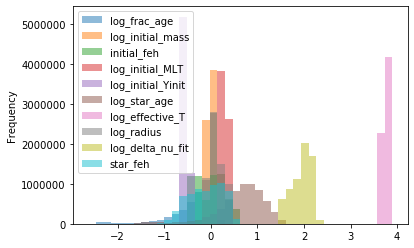

In [12]:
%matplotlib inline
tracks.get_data().plot(kind='hist',
                       y=x_cols+y_cols,
                       bins=40, alpha=0.5)

In [13]:
fac, df = tracks.normalize(loc='50%', columns=x_cols+y_cols)
fac

,column,norm_column,loc,scale
0,log_frac_age,log_frac_age_norm,-0.075591,1.0
1,log_initial_mass,log_initial_mass_norm,-0.004365,1.0
2,initial_feh,initial_feh_norm,0.000000,1.0
3,log_initial_MLT,log_initial_MLT_norm,0.278754,1.0
4,log_initial_Yinit,log_initial_Yinit_norm,-0.552842,1.0
5,log_star_age,log_star_age_norm,0.733587,1.0
6,log_effective_T,log_effective_T_norm,3.752736,1.0
7,log_radius,log_radius_norm,0.092258,1.0
8,log_delta_nu_fit,log_delta_nu_fit_norm,1.995035,1.0
9,star_feh,star_feh_norm,-0.094866,1.0


In [14]:
df.head()

,log_frac_age_norm,log_initial_mass_norm,initial_feh_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
407,-2.318959,0.004365,-0.1,0.082974,-0.066947,-2.171683,0.009821,-0.153525,0.227345,-0.005322
408,-2.310162,0.004365,-0.1,0.082974,-0.066947,-2.162886,0.009187,-0.155325,0.230036,-0.005332
409,-2.299835,0.004365,-0.1,0.082974,-0.066947,-2.152559,0.008612,-0.156667,0.232046,-0.005344
410,-2.287759,0.004365,-0.1,0.082974,-0.066947,-2.140483,0.008141,-0.157465,0.233248,-0.005356
411,-2.273697,0.004365,-0.1,0.082974,-0.066947,-2.126421,0.007803,-0.157715,0.233634,-0.005372


In [15]:
tracks.normalize(loc='50%', columns=x_cols+y_cols, inplace=True)
tracks.get_data().head()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,...,log_frac_age_norm,log_initial_mass_norm,initial_feh_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
407,1,1.0,0.24,-0.1,2.3,1.0,0.036467,0.004031,5788.367004,0.760630,...,-2.318959,0.004365,-0.1,0.082974,-0.066947,-2.171683,0.009821,-0.153525,0.227345,-0.005322
408,1,1.0,0.24,-0.1,2.3,1.0,0.037214,0.004114,5779.922526,0.749957,...,-2.310162,0.004365,-0.1,0.082974,-0.066947,-2.162886,0.009187,-0.155325,0.230036,-0.005332
409,1,1.0,0.24,-0.1,2.3,1.0,0.038109,0.004213,5772.288187,0.741406,...,-2.299835,0.004365,-0.1,0.082974,-0.066947,-2.152559,0.008612,-0.156667,0.232046,-0.005344
410,1,1.0,0.24,-0.1,2.3,1.0,0.039184,0.004332,5766.020545,0.735484,...,-2.287759,0.004365,-0.1,0.082974,-0.066947,-2.140483,0.008141,-0.157465,0.233248,-0.005356
411,1,1.0,0.24,-0.1,2.3,1.0,0.040473,0.004474,5761.544407,0.732361,...,-2.273697,0.004365,-0.1,0.082974,-0.066947,-2.126421,0.007803,-0.157715,0.233634,-0.005372


In [16]:
x_cols = [f'{col}_norm' for col in x_cols ]
y_cols = [f'{col}_norm' for col in y_cols ]
print(x_cols)
print(y_cols)

['log_frac_age_norm', 'log_initial_mass_norm', 'initial_feh_norm', 'log_initial_MLT_norm', 'log_initial_Yinit_norm']
['log_star_age_norm', 'log_effective_T_norm', 'log_radius_norm', 'log_delta_nu_fit_norm', 'star_feh_norm']


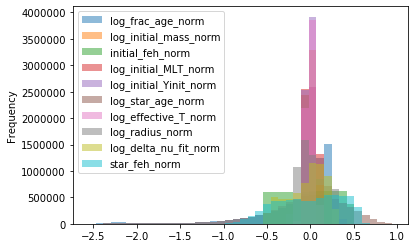

In [17]:
%matplotlib inline
tracks.get_data().plot(kind='hist',
                       y=x_cols+y_cols,
                       bins=40, alpha=0.5)

In [18]:
data = tracks.get_data()
data_floats = df.select_dtypes(include=['float'])
data_floats.head()

,log_frac_age_norm,log_initial_mass_norm,initial_feh_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
407,-2.318959,0.004365,-0.1,0.082974,-0.066947,-2.171683,0.009821,-0.153525,0.227345,-0.005322
408,-2.310162,0.004365,-0.1,0.082974,-0.066947,-2.162886,0.009187,-0.155325,0.230036,-0.005332
409,-2.299835,0.004365,-0.1,0.082974,-0.066947,-2.152559,0.008612,-0.156667,0.232046,-0.005344
410,-2.287759,0.004365,-0.1,0.082974,-0.066947,-2.140483,0.008141,-0.157465,0.233248,-0.005356
411,-2.273697,0.004365,-0.1,0.082974,-0.066947,-2.126421,0.007803,-0.157715,0.233634,-0.005372


In [20]:
data[data_floats.columns] = data_floats.astype(np.float32)
data.head()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,...,log_frac_age_norm,log_initial_mass_norm,initial_feh_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
407,1,1.0,0.24,-0.1,2.3,1.0,0.036467,0.004031,5788.367004,0.760630,...,-2.318959,0.004365,-0.1,0.082974,-0.066947,-2.171683,0.009821,-0.153525,0.227345,-0.005322
408,1,1.0,0.24,-0.1,2.3,1.0,0.037214,0.004114,5779.922526,0.749957,...,-2.310162,0.004365,-0.1,0.082974,-0.066947,-2.162886,0.009187,-0.155325,0.230036,-0.005332
409,1,1.0,0.24,-0.1,2.3,1.0,0.038109,0.004213,5772.288187,0.741406,...,-2.299835,0.004365,-0.1,0.082974,-0.066947,-2.152559,0.008612,-0.156667,0.232046,-0.005344
410,1,1.0,0.24,-0.1,2.3,1.0,0.039184,0.004332,5766.020545,0.735484,...,-2.287759,0.004365,-0.1,0.082974,-0.066947,-2.140483,0.008141,-0.157465,0.233248,-0.005356
411,1,1.0,0.24,-0.1,2.3,1.0,0.040473,0.004474,5761.544407,0.732361,...,-2.273697,0.004365,-0.1,0.082974,-0.066947,-2.126421,0.007803,-0.157715,0.233634,-0.005372


In [21]:
tracks.set_data(data)

In [22]:
save_path = '/rds/projects/d/daviesgr-alex-phd/interstellar_data'

tracks.save(save_path)